In [ ]:
# STEP 1️⃣ : Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
# STEP 2️⃣ : Load and Clean the Dataset
# ------------------------------------------------------------
df = pd.read_csv("auslan_dataset.csv", low_memory=False)

# Identify label column (update if needed)
label_col = 'label'  # change if your dataset uses 'class' or something else

if label_col not in df.columns:
    print("⚠️ Please check your dataset: 'label' column not found.")
else:
    print("✅ Found label column:", label_col)

# Convert object (string) columns to numeric, coercing errors
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Separate features and labels
X = df.drop(label_col, axis=1) # Keep as DataFrame for easier imputation
y = df[label_col].values

# Calculate percentage of missing values for each column
missing_percentages = X.isnull().mean()

# Drop columns with more than a certain percentage of missing values (e.g., 50%)
cols_to_drop = missing_percentages[missing_percentages > 0.5].index
X = X.drop(columns=cols_to_drop)
print(f"Dropped {len(cols_to_drop)} columns with more than 50% missing values.")


# Impute remaining missing values with the mean of each column
X = X.fillna(X.mean())

# Encode label column
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Data cleaned and scaled successfully!")
print("Features shape:", X_scaled.shape)
print("Number of classes:", len(np.unique(y)))

✅ Found label column: label
Dropped 1782 columns with more than 50% missing values.
✅ Data cleaned and scaled successfully!
Features shape: (2565, 1212)
Number of classes: 1


In [ ]:
# STEP 3️⃣ : Create High and Low Quality Datasets
# ------------------------------------------------------------
# High quality = original (simulating 200Hz)
X_high = X_scaled.copy()
y_high = y.copy()

# Low quality = downsampled version (simulating 50Hz)
# by keeping every 4th feature (reduce temporal resolution)
X_low = X_high[:, ::4]

print("\nHigh Quality shape:", X_high.shape)
print("Low Quality shape:", X_low.shape)



High Quality shape: (648, 2994)
Low Quality shape: (648, 749)


In [ ]:
# STEP 4️⃣ : Split into Train and Test Sets
# ------------------------------------------------------------
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high, y_high, test_size=0.2, random_state=42)
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_high, test_size=0.2, random_state=42)


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [2114 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124 2125 2126 2127
 2128 2129 2130 2131 2132 2133 2134 2135 2136 2137 2138 2139 2140 2141
 2142 2143 2144 2145 2146 2147 2148 2149 2150 2151 2152 2153 2154 2155
 2156 2157 2158 2159 2160 2161 2162 2163 2164 2165 2166 2167 2168 2169
 2170 2171 2172 2173 2174 2175 2176 2177 2178 2179 2180 2181 2182 2183
 2184 2185 2186 2187 2188 2189 2190 2191 2192 2193 2194 2195 2196 2197
 2198 2199 2200 2201 2202 2203 2204 2205 2206 2207 2208 2209 2210 2211
 2212 2213 2214 2215 2216 2217 2218 2219 2220 2221 2222 2223 2224 2225
 2226 2227 2228 2229 2230 2231 2232 2233 2234 2235 2236 2237 2238 2239
 2240 2241 2242 2243 2244 2245 2246 2247 2248 2249 2250 2251 2252 2253
 2254 2255 2256 2257 2258 2259 2260 2261 2262 2263 2264 2265 2266 2267
 2268 2269 2270 2271 2272 2273 2274 2275 2276 2277 2278 2279 2280 2281
 2282 2283 2284 228


📘 SVM (High Quality) Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         4
           7       0.14      1.00      0.25         1
           8       0.00      0.00      0.00         1
           9       0.50      1.00      0.67         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       1.00      0.50      0.67         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00        

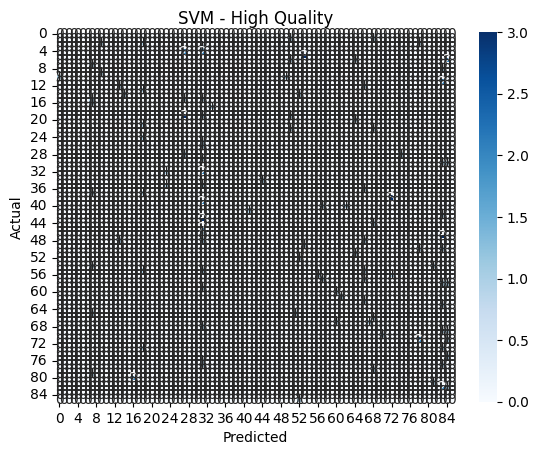

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [2114 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124 2125 2126 2127
 2128 2129 2130 2131 2132 2133 2134 2135 2136 2137 2138 2139 2140 2141
 2142 2143 2144 2145 2146 2147 2148 2149 2150 2151 2152 2153 2154 2155
 2156 2157 2158 2159 2160 2161 2162 2163 2164 2165 2166 2167 2168 2169
 2170 2171 2172 2173 2174 2175 2176 2177 2178 2179 2180 2181 2182 2183
 2184 2185 2186 2187 2188 2189 2190 2191 2192 2193 2194 2195 2196 2197
 2198 2199 2200 2201 2202 2203 2204 2205 2206 2207 2208 2209 2210 2211
 2212 2213 2214 2215 2216 2217 2218 2219 2220 2221 2222 2223 2224 2225
 2226 2227 2228 2229 2230 2231 2232 2233 2234 2235 2236 2237 2238 2239
 2240 2241 2242 2243 2244 2245 2246 2247 2248 2249 2250 2251 2252 2253
 2254 2255 2256 2257 2258 2259 2260 2261 2262 2263 2264 2265 2266 2267
 2268 2269 2270 2271 2272 2273 2274 2275 2276 2277 2278 2279 2280 2281
 2282 2283 2284 228


📗 Logistic Regression (High Quality) Report:
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      0.25      0.40         4
           5       1.00      0.67      0.80         3
           6       1.00      0.25      0.40         4
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2
          12       1.00      1.00      1.00         2
          13       0.50      1.00      0.67         1
          14       0.33      0.50      0.40         2
          15       0.67      0.67      0.67         3
          16       0.00      0.00      0.00         1
          17       0.00      0.00  

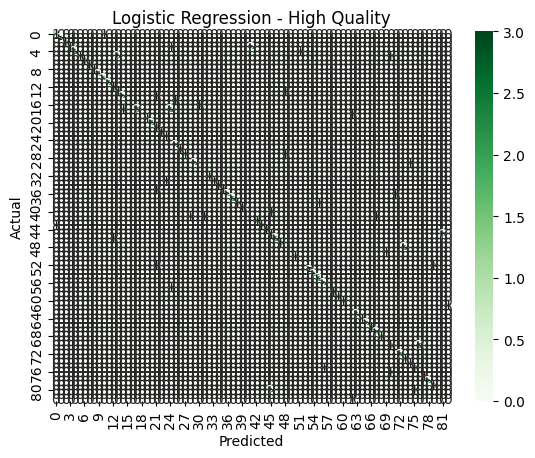

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546
 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564
 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582
 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600
 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618
 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636
 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654
 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672
 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690
 691 692 693 694 695 696 697 698 699 700 701 702 703 704 705 706 707 708
 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725 726
 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743


📘 SVM (Low Quality) Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         4
           7       0.25      1.00      0.40         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       1.00      0.50      0.67         2
          13       0.00      0.00      0.00         1
          14       0.25      0.50      0.33         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         

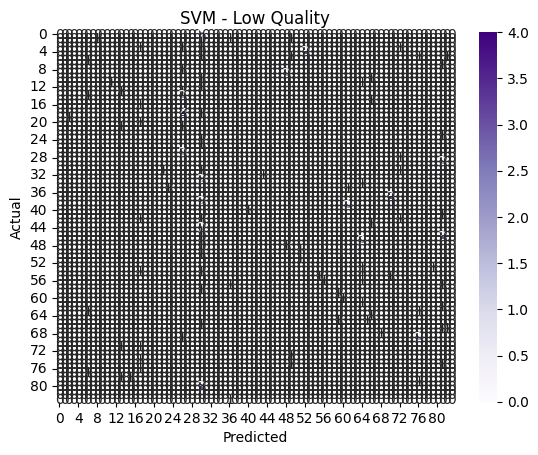

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: [529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546
 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564
 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582
 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600
 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618
 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636
 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654
 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672
 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690
 691 692 693 694 695 696 697 698 699 700 701 702 703 704 705 706 707 708
 709 710 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725 726
 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743


📗 Logistic Regression (Low Quality) Report:
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      0.67      0.80         3
           3       0.50      1.00      0.67         1
           4       1.00      0.25      0.40         4
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         4
           7       1.00      1.00      1.00         1
           8       0.00      0.00      0.00         1
           9       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      0.50      0.67         2
          13       0.00      0.00      0.00         1
          14       0.33      0.50      0.40         2
          15       1.00      0.33      0.50         3
          16       0.20      1.00      0.33         1
          17       1.00      1.00   

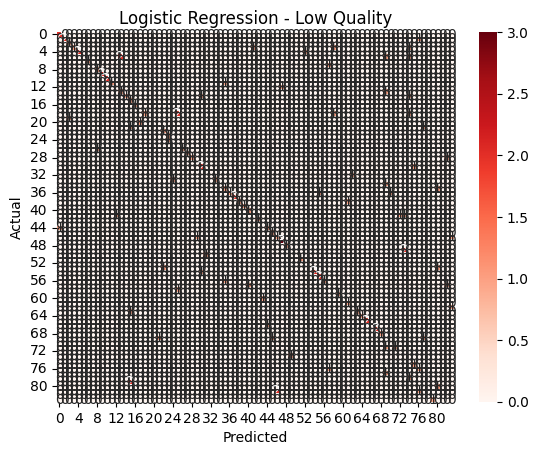

In [ ]:
# STEP 5️⃣ : Train SVM and Logistic Regression Models
# ------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

def plot_confusion_matrix(y_true, y_pred, title, cmap='Blues'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Create pipelines for SVM and Logistic Regression
svm_high_pipe = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), SVC(kernel='rbf'))
log_high_pipe = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), LogisticRegression(max_iter=1000))
svm_low_pipe = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), SVC(kernel='rbf'))
log_low_pipe = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler(), LogisticRegression(max_iter=1000))


# --- SVM High Quality ---
svm_high_pipe.fit(X_train_high, y_train_high)
y_pred_high_svm = svm_high_pipe.predict(X_test_high)
print("\n📘 SVM (High Quality) Report:")
print(classification_report(y_test_high, y_pred_high_svm, zero_division=0))
plot_confusion_matrix(y_test_high, y_pred_high_svm, "SVM - High Quality", cmap='Blues')

# --- Logistic Regression High Quality ---
log_high_pipe.fit(X_train_high, y_train_high)
y_pred_high_log = log_high_pipe.predict(X_test_high)
print("\n📗 Logistic Regression (High Quality) Report:")
print(classification_report(y_test_high, y_pred_high_log, zero_division=0))
plot_confusion_matrix(y_test_high, y_pred_high_log, "Logistic Regression - High Quality", cmap='Greens')

# --- SVM Low Quality ---
svm_low_pipe.fit(X_train_low, y_train_low)
y_pred_low_svm = svm_low_pipe.predict(X_test_low)
print("\n📘 SVM (Low Quality) Report:")
print(classification_report(y_test_low, y_pred_low_svm, zero_division=0))
plot_confusion_matrix(y_test_low, y_pred_low_svm, "SVM - Low Quality", cmap='Purples')

# --- Logistic Regression Low Quality ---
log_low_pipe.fit(X_train_low, y_train_low)
y_pred_low_log = log_low_pipe.predict(X_test_low)
print("\n📗 Logistic Regression (Low Quality) Report:")
print(classification_report(y_test_low, y_pred_low_log, zero_division=0))
plot_confusion_matrix(y_test_low, y_pred_low_log, "Logistic Regression - Low Quality", cmap='Reds')

In [ ]:
#Performance metrics for SVM and Logistic regression
from sklearn.metrics import classification_report

# Use zero_division=0 to avoid UndefinedMetricWarning
svm_report_high = classification_report(y_test_high, y_pred_high_svm, output_dict=True, zero_division=0)
svm_report_low  = classification_report(y_test_low, y_pred_low_svm, output_dict=True, zero_division=0)
log_report_high = classification_report(y_test_high, y_pred_high_log, output_dict=True, zero_division=0)
log_report_low  = classification_report(y_test_low, y_pred_low_log, output_dict=True, zero_division=0)


# Function to extract metrics for class 'weighted avg' or 'macro avg'
def extract_metrics(report):
    return {
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"]
    }

# Build DataFrame
metrics_table = pd.DataFrame({
    "SVM (High Quality)": extract_metrics(svm_report_high),
    "SVM (Low Quality)": extract_metrics(svm_report_low),
    "LogReg (High Quality)": extract_metrics(log_report_high),
    "LogReg (Low Quality)": extract_metrics(log_report_low)
})

# Round to 3 decimals
metrics_table = metrics_table.round(3)

# Display the table
print("=== 🔍 Model Metrics Summary ===")
print(metrics_table)


=== 🔍 Model Metrics Summary ===
           SVM (High Quality)  SVM (Low Quality)  LogReg (High Quality)  \
Precision               0.092              0.101                  0.736   
Recall                  0.092              0.092                  0.654   
F1-Score                0.083              0.086                  0.658   

           LogReg (Low Quality)  
Precision                 0.577  
Recall                    0.477  
F1-Score                  0.478  


Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.0195 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0106 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0155 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0145 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.0130 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0060 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0102 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0136 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 9/15


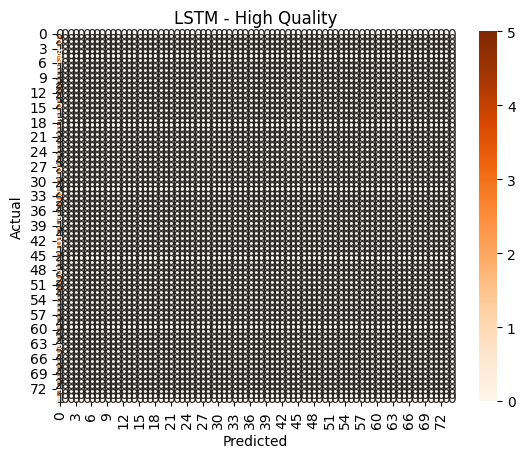

In [ ]:
# STEP 6️⃣ : LSTM Model for  High Quality Data
# ------------------------------------------------------------
# Reshape for LSTM: (samples, timesteps=1, features)
X_train_high_lstm = X_train_high.reshape((X_train_high.shape[0], 1, X_train_high.shape[1]))
X_test_high_lstm = X_test_high.reshape((X_test_high.shape[0], 1, X_test_high.shape[1]))

lstm_model_high = Sequential([
    LSTM(64, input_shape=(X_train_high_lstm.shape[1], X_train_high_lstm.shape[2])),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_high)), activation='softmax')
])

lstm_model_high.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = lstm_model_high.fit(X_train_high_lstm, y_train_high, epochs=15, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
y_pred_high_lstm = np.argmax(lstm_model_high.predict(X_test_high_lstm), axis=1)
print("\n📙 LSTM (High Quality) Report:")
print(classification_report(y_test_high, y_pred_high_lstm, zero_division=0))
plot_confusion_matrix(y_test_high, y_pred_high_lstm, "LSTM - High Quality", cmap='Oranges')

In [ ]:
# STEP 6️⃣ : LSTM Model for Low Quality Data
# ------------------------------------------------------------
# Reshape for LSTM: (samples, timesteps=1, features)
X_train_low_lstm = X_train_low.reshape((X_train_low.shape[0], 1, X_train_low.shape[1]))
X_test_low_lstm = X_test_low.reshape((X_test_low.shape[0], 1, X_test_low.shape[1]))

# Define y_low
y_low = y.copy()

# LSTM Model for Low Quality
lstm_model_low = Sequential([
    LSTM(64, input_shape=(X_train_low_lstm.shape[1], X_train_low_lstm.shape[2])),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_low)), activation='softmax')
])

lstm_model_low.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_low = lstm_model_low.fit(X_train_low_lstm, y_train_low, epochs=15, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
y_pred_low_lstm = np.argmax(lstm_model_low.predict(X_test_low_lstm), axis=1)
print("\n📙 LSTM (Low Quality) Report:")
print(classification_report(y_test_low, y_pred_low_lstm))

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.0154 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0165 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0116 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0133 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0172 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0134 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0112 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0122 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 9/15


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.metrics import accuracy_score

# -----------------------------
# LSTM - High Quality Errors
# -----------------------------
# Training predictions
y_train_pred_high = np.argmax(lstm_model_high.predict(X_train_high_lstm), axis=1)
train_error_high = 1 - accuracy_score(y_train_high, y_train_pred_high)

# Testing predictions
test_error_high = 1 - accuracy_score(y_test_high, y_pred_high_lstm)

print("📙 LSTM High Quality:")
print(f"Training Error: {train_error_high:.3f}")
print(f"Testing Error: {test_error_high:.3f}")

# -----------------------------
# LSTM - Low Quality Errors
# -----------------------------
# Training predictions
y_train_pred_low = np.argmax(lstm_model_low.predict(X_train_low_lstm), axis=1)
train_error_low = 1 - accuracy_score(y_train_low, y_train_pred_low)

# Testing predictions
test_error_low = 1 - accuracy_score(y_test_low, y_pred_low_lstm)

print("\n📙 LSTM Low Quality:")
print(f"Training Error: {train_error_low:.3f}")
print(f"Testing Error: {test_error_low:.3f}")


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
📙 LSTM High Quality:
Training Error: 0.037
Testing Error: 0.138
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

📙 LSTM Low Quality:
Training Error: 0.073
Testing Error: 0.244


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np

# -----------------------------
# Function to extract metrics for SVM and Logistic Regression
# -----------------------------
def extract_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    accuracy = accuracy_score(y_true, y_pred)
    metrics = {
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"],
        "Accuracy": accuracy,
        "Testing Error": 1 - accuracy
    }
    return metrics

# -----------------------------
# Function to compute training error for LSTM
# -----------------------------
def lstm_training_metrics(model, X_train, y_train, X_test, y_test):
    y_train_pred = np.argmax(model.predict(X_train), axis=1)
    y_test_pred = np.argmax(model.predict(X_test), axis=1)
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_metrics = extract_metrics(y_test, y_test_pred)
    test_metrics["Training Error"] = train_error
    return test_metrics

# -----------------------------
# Metrics for SVM
# -----------------------------
svm_high_metrics = extract_metrics(y_test_high, y_pred_high_svm)
svm_low_metrics  = extract_metrics(y_test_low, y_pred_low_svm)

# -----------------------------
# Metrics for Logistic Regression
# -----------------------------
log_high_metrics = extract_metrics(y_test_high, y_pred_high_log)
log_low_metrics  = extract_metrics(y_test_low, y_pred_low_log)

# -----------------------------
# Metrics for LSTM
# -----------------------------
lstm_high_metrics = lstm_training_metrics(lstm_model_high, X_train_high_lstm, y_train_high,
                                          X_test_high_lstm, y_test_high)
lstm_low_metrics = lstm_training_metrics(lstm_model_low, X_train_low_lstm, y_train_low,
                                         X_test_low_lstm, y_test_low)

# -----------------------------
# Combine all metrics into a DataFrame
# -----------------------------
metrics_table = pd.DataFrame({
    "SVM (High Quality)": svm_high_metrics,
    "SVM (Low Quality)": svm_low_metrics,
    "LogReg (High Quality)": log_high_metrics,
    "LogReg (Low Quality)": log_low_metrics,
    "LSTM (High Quality)": lstm_high_metrics,
    "LSTM (Low Quality)": lstm_low_metrics
})

# Round values for readability
metrics_table = metrics_table.round(3)

# Display the complete metrics table
print("\n=== 🔍 Complete Model Metrics Summary ===")
print(metrics_table)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

=== 🔍 Complete Model Metrics Summary ===
                SVM (High Quality)  SVM (Low Quality)  LogReg (High Quality)  \
Precision                    0.802              0.658                  0.937   
Recall                       0.702              0.554                  0.930   
F1-Score                     0.714              0.561                  0.930   
Accuracy                     0.702              0.554                  0.930   
Testing Error                0.298              0.446                  0.070   
Training Error                 NaN                NaN                    NaN   

                LogReg (Low Quality)  LSTM (High Quality)  LSTM (Low Quality)  
Precision                      0.847                0.887               0.775  
Recall                         0.825                0.862               0.756  


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

=== 🔍 Model Comparison ===
                       SVM (High Quality)  SVM (Low Quality)  \
Accuracy                            0.702              0.554   
Testing Error                       0.298              0.446   
Training Error (LSTM)                 NaN                NaN   

                       LogReg (High Quality)  LogReg (Low Quality)  \
Accuracy                                0.93                 0.825   
Testing Error                           0.07                 0.175   
Training Error (LSTM)                    NaN                   NaN   

                       LSTM (High Quality)  LSTM (Low Quality)  
Accuracy                             0.862               0.756  
Testing Error                        0.138               0.244  
Training Error (LSTM)                0.037               0.073  


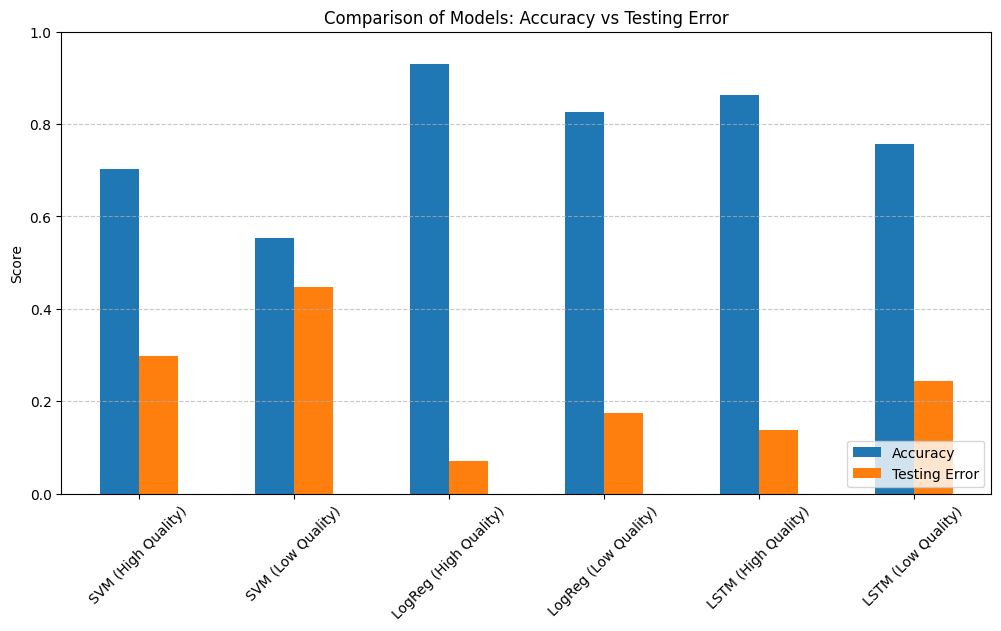

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Create a comparison DataFrame
# -----------------------------
comparison_df = pd.DataFrame({
    "SVM (High Quality)": [accuracy_score(y_test_high, y_pred_high_svm), 1 - accuracy_score(y_test_high, y_pred_high_svm), None],
    "SVM (Low Quality)": [accuracy_score(y_test_low, y_pred_low_svm), 1 - accuracy_score(y_test_low, y_pred_low_svm), None],
    "LogReg (High Quality)": [accuracy_score(y_test_high, y_pred_high_log), 1 - accuracy_score(y_test_high, y_pred_high_log), None],
    "LogReg (Low Quality)": [accuracy_score(y_test_low, y_pred_low_log), 1 - accuracy_score(y_test_low, y_pred_low_log), None],
    "LSTM (High Quality)": [accuracy_score(y_test_high, y_pred_high_lstm), 1 - accuracy_score(y_test_high, y_pred_high_lstm), 1 - accuracy_score(y_train_high, np.argmax(lstm_model_high.predict(X_train_high_lstm), axis=1))],
    "LSTM (Low Quality)": [accuracy_score(y_test_low, y_pred_low_lstm), 1 - accuracy_score(y_test_low, y_pred_low_lstm), 1 - accuracy_score(y_train_low, np.argmax(lstm_model_low.predict(X_train_low_lstm), axis=1))]
}, index=["Accuracy", "Testing Error", "Training Error (LSTM)"])

# Round for readability
comparison_df = comparison_df.round(3)

# Display the table
print("\n=== 🔍 Model Comparison ===")
print(comparison_df)

# -----------------------------
# Optional: Bar plot for comparison
# -----------------------------
comparison_df_plot = comparison_df.drop(index="Training Error (LSTM)")  # drop training error for bar chart

comparison_df_plot.T.plot(kind='bar', figsize=(12,6))
plt.title("Comparison of Models: Accuracy vs Testing Error")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()


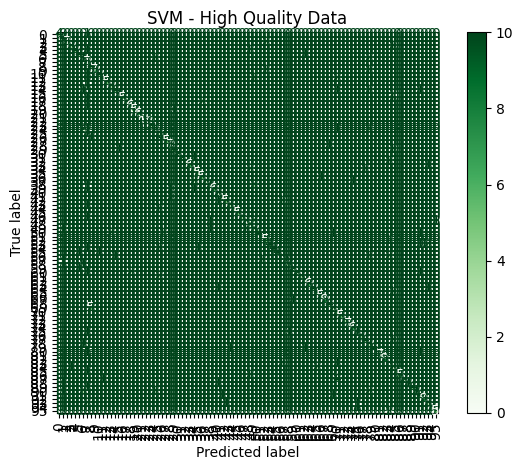

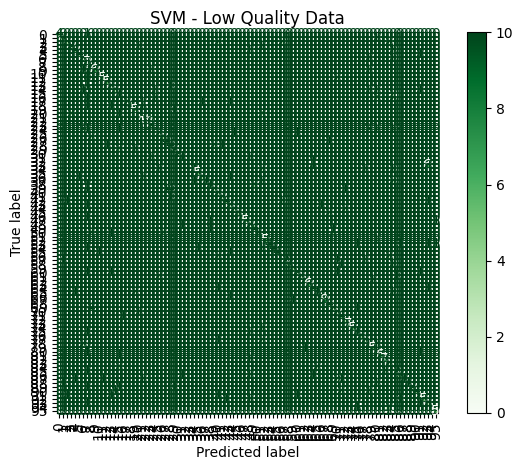

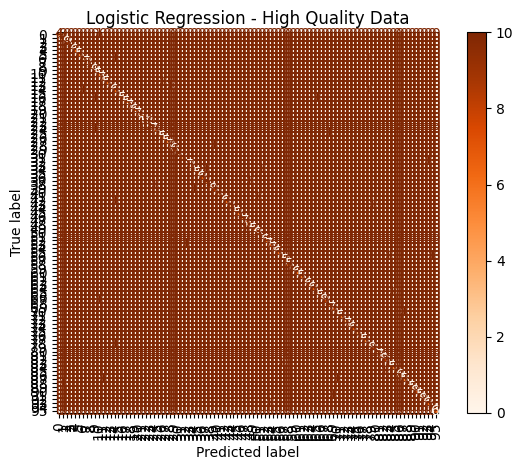

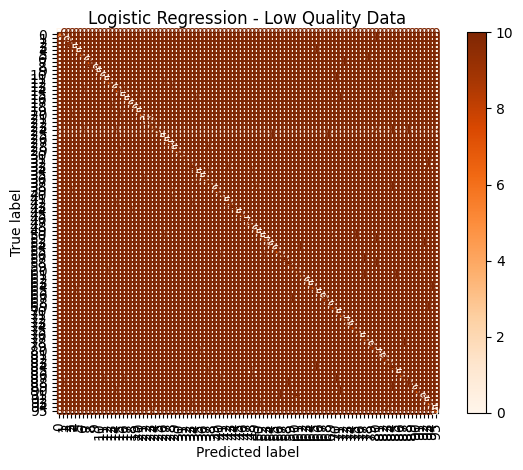

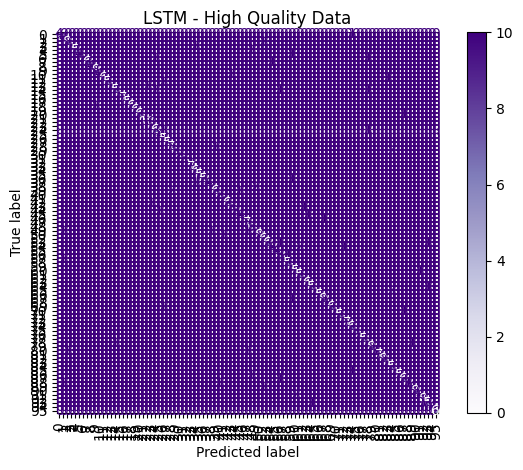

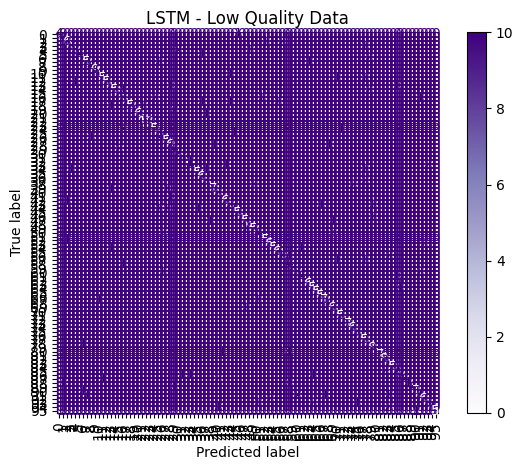

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Corrected function to plot confusion matrix
# -----------------------------
def plot_cm(y_true, y_pred, model_name, data_quality, cmap='Blues'):
    # Get sorted unique labels from both y_true and y_pred
    unique_labels = np.unique(np.concatenate((y_true, y_pred)))

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true, y_pred,
        display_labels=unique_labels,
        cmap=cmap,
        xticks_rotation='vertical'
    )

    # Set proper ticks manually
    disp.ax_.set_xticks(np.arange(len(unique_labels)))
    disp.ax_.set_yticks(np.arange(len(unique_labels)))
    disp.ax_.set_xticklabels(unique_labels)
    disp.ax_.set_yticklabels(unique_labels)

    disp.ax_.set_title(f"{model_name} - {data_quality} Data")
    plt.tight_layout()
    plt.show()

# -----------------------------
# Example usage for all models
# -----------------------------

# SVM
plot_cm(y_test_high, y_pred_high_svm, "SVM", "High Quality", cmap='Greens')
plot_cm(y_test_low, y_pred_low_svm, "SVM", "Low Quality", cmap='Greens')

# Logistic Regression
plot_cm(y_test_high, y_pred_high_log, "Logistic Regression", "High Quality", cmap='Oranges')
plot_cm(y_test_low, y_pred_low_log, "Logistic Regression", "Low Quality", cmap='Oranges')

# LSTM
plot_cm(y_test_high, y_pred_high_lstm, "LSTM", "High Quality", cmap='Purples')
plot_cm(y_test_low, y_pred_low_lstm, "LSTM", "Low Quality", cmap='Purples')


✅ Dataset Loaded Successfully!
Shape: (2565, 2995)
Dropped 1782 columns with more than 50% missing values.
✅ Data after cleaning: 2565 samples, 1210 features
✅ Data Preprocessing Done
High-quality features: 1210
Low-quality features (downsampled): 303
✅ Binary pattern matrix shape (Low Quality): (2052, 909)
✅ Binary pattern matrix shape (High Quality): (2052, 3630)

📗 SPM + SVM (Low Quality) — Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       0.11      0.25      0.15         4
           2       0.33      0.11      0.17         9
           3       0.14      0.25      0.18         4
           4       0.33      0.33      0.33         6
           5       0.75      0.60      0.67         5
           6       0.08      0.25      0.12         4
           7       1.00      0.71      0.83         7
           8       0.20      0.50      0.29         4
           9       0.30      0.33      

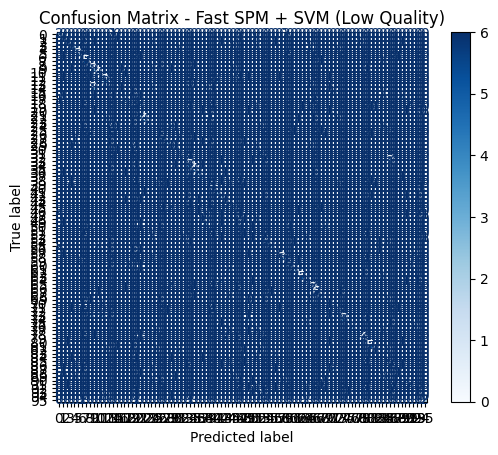


📗 SPM + SVM (High Quality) — Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.00      0.00      0.00         4
           2       0.33      0.11      0.17         9
           3       0.40      0.50      0.44         4
           4       0.80      0.67      0.73         6
           5       0.67      0.80      0.73         5
           6       0.12      0.25      0.17         4
           7       0.88      1.00      0.93         7
           8       0.33      1.00      0.50         4
           9       0.00      0.00      0.00         9
          10       0.40      0.40      0.40         5
          11       0.25      0.14      0.18         7
          12       0.75      0.50      0.60         6
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         8
          15       0.25      0.67      0.36         3
          16       0.14     

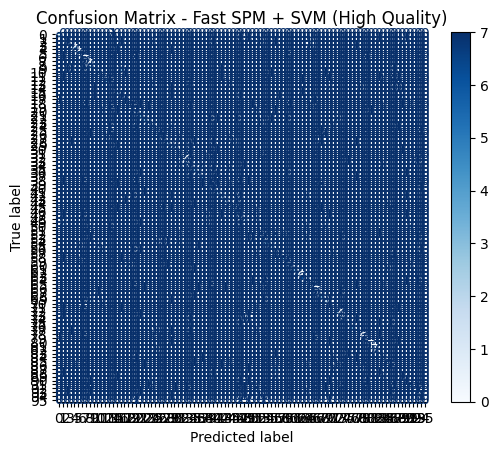

In [ ]:
# ===============================================================
# 🔹 Step 1: Import Libraries
# ===============================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ===============================================================
# 🔹 Step 2: Load and Preprocess Dataset
# ===============================================================
data = pd.read_csv("auslan_dataset.csv", low_memory=False)
print("✅ Dataset Loaded Successfully!")
print("Shape:", data.shape)

# Drop irrelevant columns
drop_cols = [col for col in ['instance_id', 'n_frames'] if col in data.columns]
data = data.drop(columns=drop_cols, errors='ignore')

# Convert features to numeric, coercing errors
for col in data.columns:
    if col != 'label':
        data[col] = pd.to_numeric(data[col], errors='coerce')


# Features and labels
X = data.drop(columns=['label'])
y = data['label']

# Calculate percentage of missing values for each column
missing_percentages = X.isnull().mean()

# Drop columns with more than a certain percentage of missing values (e.g., 50%)
cols_to_drop = missing_percentages[missing_percentages > 0.5].index
X = X.drop(columns=cols_to_drop)
print(f"Dropped {len(cols_to_drop)} columns with more than 50% missing values.")

# Impute remaining missing values with the mean of each column
X = X.fillna(X.mean())

print(f"✅ Data after cleaning: {X.shape[0]} samples, {X.shape[1]} features")

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Data Preprocessing Done")

# ===============================================================
# 🔹 Step 3: Create High- and Low-Quality Datasets
# ===============================================================
X_train_hq, X_test_hq, y_train_hq, y_test_hq = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# Low-quality dataset (downsample features)
X_lowq = X_scaled[:, ::4]
X_train_lq, X_test_lq, y_train_lq, y_test_lq = train_test_split(
    X_lowq, y_encoded, test_size=0.2, random_state=42
)

print(f"High-quality features: {X_scaled.shape[1]}")
print(f"Low-quality features (downsampled): {X_lowq.shape[1]}")

# ===============================================================
# 🔹 Step 4: Fast Sequential Pattern Encoding
# ===============================================================
def fast_discretize(X, threshold=0.02):
    """
    Vectorized discretization: 'I'=1, 'S'=0, 'D'=-1
    """
    delta = np.diff(X, axis=0, prepend=X[0:1, :])
    X_disc = np.zeros_like(X, dtype=int)
    X_disc[delta > threshold] = 1    # Increase
    X_disc[delta < -threshold] = -1  # Decrease
    return X_disc

def one_hot_encode_patterns(X_disc):
    """
    Encode each feature's state (-1,0,1) as separate binary columns
    """
    n_samples, n_features = X_disc.shape
    X_encoded = np.zeros((n_samples, n_features * 3), dtype=int)
    for i, state in enumerate([-1, 0, 1]):  # D, S, I
        X_encoded[:, i::3] = (X_disc == state).astype(int)
    return X_encoded

# Discretize low-quality features
X_train_lq_disc = fast_discretize(X_train_lq)
X_test_lq_disc  = fast_discretize(X_test_lq)

# One-hot encode discrete patterns
X_train_spm_features_lq = one_hot_encode_patterns(X_train_lq_disc)
X_test_spm_features_lq  = one_hot_encode_patterns(X_test_lq_disc)

print(f"✅ Binary pattern matrix shape (Low Quality): {X_train_spm_features_lq.shape}")

# Discretize high-quality features
X_train_hq_disc = fast_discretize(X_train_hq)
X_test_hq_disc  = fast_discretize(X_test_hq)

# One-hot encode discrete patterns
X_train_spm_features_hq = one_hot_encode_patterns(X_train_hq_disc)
X_test_spm_features_hq  = one_hot_encode_patterns(X_test_hq_disc)

print(f"✅ Binary pattern matrix shape (High Quality): {X_train_spm_features_hq.shape}")


# ===============================================================
# 🔹 Step 5: Train SVM
# ===============================================================
# SVM for Low Quality SPM features
svm_spm_lowq = SVC(kernel='rbf', C=5, gamma='scale', random_state=42)
svm_spm_lowq.fit(X_train_spm_features_lq, y_train_lq)
y_pred_low_spm = svm_spm_lowq.predict(X_test_spm_features_lq)

# SVM for High Quality SPM features
svm_spm_highq = SVC(kernel='rbf', C=5, gamma='scale', random_state=42)
svm_spm_highq.fit(X_train_spm_features_hq, y_train_hq)
y_pred_high_spm = svm_spm_highq.predict(X_test_spm_features_hq)


# ===============================================================
# 🔹 Step 6: Evaluation
# ===============================================================
print("\n📗 SPM + SVM (Low Quality) — Classification Report:")
print(classification_report(y_test_lq, y_pred_low_spm, zero_division=0))

# Confusion Matrix (Low Quality)
cm_lowq = confusion_matrix(y_test_lq, y_pred_low_spm)
disp_lowq = ConfusionMatrixDisplay(confusion_matrix=cm_lowq)
disp_lowq.plot(cmap='Blues')
plt.title("Confusion Matrix - Fast SPM + SVM (Low Quality)")
plt.show()

print("\n📗 SPM + SVM (High Quality) — Classification Report:")
print(classification_report(y_test_hq, y_pred_high_spm, zero_division=0))

# Confusion Matrix (High Quality)
cm_highq = confusion_matrix(y_test_hq, y_pred_high_spm)
disp_highq = ConfusionMatrixDisplay(confusion_matrix=cm_highq)
disp_highq.plot(cmap='Blues')
plt.title("Confusion Matrix - Fast SPM + SVM (High Quality)")
plt.show()